<a href="https://colab.research.google.com/github/Pree-om/SangRakshak/blob/main/training2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import kagglehub

path = kagglehub.dataset_download("permanalwep/crowdhuman-crowd-detection")
print("Downloaded to:", path)

100%|██████████| 830M/830M [00:38<00:00, 22.8MB/s]

Extracting files...


Downloaded to: /root/.cache/kagglehub/datasets/permanalwep/crowdhuman-crowd-detection/versions/5


In [5]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/permanalwep/crowdhuman-crowd-detection/"

if os.path.exists(dataset_path):
    print("Dataset exists at:", dataset_path)
    print("Files inside dataset folder:", os.listdir(dataset_path))
else:
    print("Dataset not found again!")

Dataset exists at: /root/.cache/kagglehub/datasets/permanalwep/crowdhuman-crowd-detection/
Files inside dataset folder: ['versions', '5.complete']


In [6]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/permanalwep/crowdhuman-crowd-detection/"

print("Files in dataset directory:", os.listdir(dataset_path))

Files in dataset directory: ['versions', '5.complete']


In [7]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/permanalwep/crowdhuman-crowd-detection/versions/5"

print("Files in dataset directory:", os.listdir(dataset_path))

Files in dataset directory: ['CrowdHuman Cropped']


In [8]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/permanalwep/crowdhuman-crowd-detection/versions/5/CrowdHuman Cropped"

print("Files in dataset directory:", os.listdir(dataset_path)[:10])  # Display first 10 files

Files in dataset directory: ['Dataset CrowdHuman']


In [9]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/permanalwep/crowdhuman-crowd-detection/versions/5/CrowdHuman Cropped"

# List contents of the directory
files = os.listdir(dataset_path)

if files:
    print("Sample files in dataset directory:", files[:10])  # Show first 10 files
else:
    print("The folder is empty.")

Sample files in dataset directory: ['Dataset CrowdHuman']


In [10]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/permanalwep/crowdhuman-crowd-detection/versions/5/CrowdHuman Cropped/Dataset CrowdHuman"

# List contents of the subdirectory
if os.path.exists(dataset_path):
    files = os.listdir(dataset_path)
    print("Files in Dataset CrowdHuman:", files[:10])  # Display first 10 files
else:
    print("The subdirectory does not exist.")

Files in Dataset CrowdHuman: ['non crowd', 'crowd']


In [11]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/permanalwep/crowdhuman-crowd-detection/versions/5/CrowdHuman Cropped/Dataset CrowdHuman/crowd"

if os.path.exists(dataset_path):
    files = os.listdir(dataset_path)
    print("Files in 'crowd':", files[:10])  # Show first 10 files
else:
    print("'crowd' folder does not exist.")

Files in 'crowd': ['284193-2a65d00041049cd0_jpg.rf.ba5a45dc22fb5104cd2153d2fa6548be.jpg', '282555-410c40008961b1c4_jpg.rf.981362474bad0a22e7884429dd738f6a.jpg', '283647-28ea00033ffef70_jpg.rf.f977dbb3611d705b5a1c2e35d771f7f8.jpg', '273278-e75800001754e76f_jpg.rf.e8c8854167295ca69521f45961ea8608.jpg', '273278-1051dd0009581870d_jpg.rf.afeefda992753cc265def0250486b9a8.jpg', '283992-6ee300060badc27_jpg.rf.2fea42bfc35382b3c4d316c04436ced3.jpg', '282555-11947b0005904a7d7_jpg.rf.f7d7239826b52a419b0ba6413cf2ba7c.jpg', '273275-ec28c000abccdd87_jpg.rf.7049e353860baa10d271d3e29c5d115b.jpg', '273275-6e31400027c9981c_jpg.rf.d89923ea2af2335947e588bc88f21b38.jpg', '283991-1e65f000865cb3a4_jpg.rf.780d8405df96698ac869a815b1bced93.jpg']


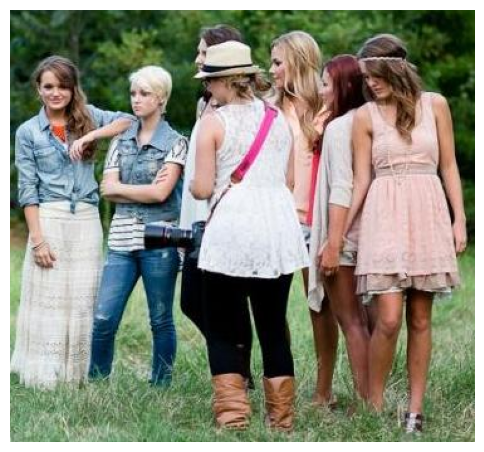

In [12]:
import cv2
import matplotlib.pyplot as plt
import os

# Define image path (update filename accordingly)
dataset_path = "/root/.cache/kagglehub/datasets/permanalwep/crowdhuman-crowd-detection/versions/5/CrowdHuman Cropped/Dataset CrowdHuman/crowd"
image_files = [f for f in os.listdir(dataset_path) if f.endswith(".jpg")]

if image_files:
    img_path = os.path.join(dataset_path, image_files[0])  # Load first image

    # Read and display image
    image = cv2.imread(img_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display

    plt.figure(figsize=(6,6))
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.show()
else:
    print("No JPG images found in 'crowd' folder.")

In [13]:
!pip install tensorflow numpy matplotlib opencv-python scikit-learn

In [14]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [16]:
dataset_path = "/root/.cache/kagglehub/datasets/permanalwep/crowdhuman-crowd-detection/versions/5/CrowdHuman Cropped/Dataset CrowdHuman"

train_dir = dataset_path  # Root folder containing 'crowd' and 'non crowd' folders

In [17]:
image_size = (224, 224)  # Resize images
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values
    validation_split=0.2  # Use 20% for validation
)

# Load Training Data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # Since we have two classes
    subset='training'
)

# Load Validation Data
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 12000 images belonging to 2 classes.
Found 2998 images belonging to 2 classes.


In [18]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
epochs = 10
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 69s 164ms/step - accuracy: 0.8322 - loss: 0.4013 - val_accuracy: 0.9413 - val_loss: 0.1721
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 58s 154ms/step - accuracy: 0.9390 - loss: 0.1563 - val_accuracy: 0.9396 - val_loss: 0.1771
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 58s 153ms/step - accuracy: 0.9564 - loss: 0.1161 - val_accuracy: 0.8899 - val_loss: 0.3062
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 58s 153ms/step - accuracy: 0.9788 - loss: 0.0584 - val_accuracy: 0.8883 - val_loss: 0.2882
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 57s 152ms/step - accuracy: 0.9878 - loss: 0.0347 - val_accuracy: 0.9199 - val_loss: 0.2601
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 57s 152ms/step - accuracy: 0.9936 - loss: 0.0198 - val_accuracy: 0.9306 - val_loss: 0.2758
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 59s 157ms/step - accuracy: 0.9942 - loss: 0.0180 - val_accuracy: 0.8876 - val_loss: 0.5167
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 57s 153ms/step - accuracy: 0.9945 - loss: 0

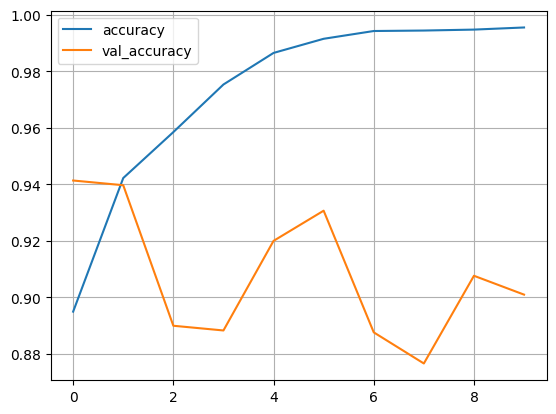

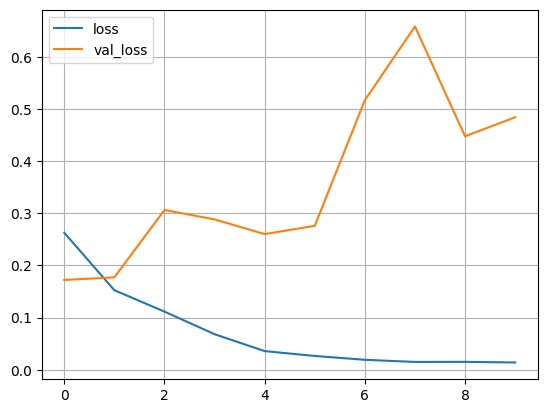

In [21]:
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend()
plt.grid()
plt.show()

In [24]:
# Evaluate on the validation data
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation Loss: {loss:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 141ms/step - accuracy: 0.9053 - loss: 0.4633
Validation Accuracy: 0.9009
Validation Loss: 0.4840


In [11]:
model_path = "/content/crowd_detection.pth"
torch.save(model.state_dict(), model_path)
print(f"Model saved at {model_path}")

Model saved at /content/crowd_detection.pth


In [26]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mangosata/exclusivelydarkimagedataset-from-cschan")

print("Path to dataset files:", path)

100%|██████████| 1.39G/1.39G [01:11<00:00, 20.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mangosata/exclusivelydarkimagedataset-from-cschan/versions/1


In [44]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/mangosata/exclusivelydarkimagedataset-from-cschan/versions/1"

print("Dataset files:", os.listdir(dataset_path))

Dataset files: ['Cat', 'Bottle', 'Boat', 'Bicycle', 'Table', 'Motorbike', 'Car', 'People', 'Bus', 'Dog', 'Cup', 'Chair']


In [53]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Dataset Path
dataset_path = "/root/.cache/kagglehub/datasets/mangosata/exclusivelydarkimagedataset-from-cschan/versions/1"

# Data Augmentation for Training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Data Loaders
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = val_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load Pretrained Model (MobileNetV2)
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze pretrained layers

# Custom Model on Top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Prevent Overfitting
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for Better Training
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

# Train Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,  # More epochs for better learning
    callbacks=callbacks
)

# Evaluate Final Accuracy
loss, accuracy = model.evaluate(val_generator)
print(f"Final Accuracy: {accuracy:.4f}")

Found 5896 images belonging to 12 classes.
Found 1467 images belonging to 12 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/25
185/185 ━━━━━━━━━━━━━━━━━━━━ 144s 716ms/step - accuracy: 0.2768 - loss: 2.6085 - val_accuracy: 0.5412 - val_loss: 1.4131 - learning_rate: 0.0010
Epoch 2/25
185/185 ━━━━━━━━━━━━━━━━━━━━ 123s 664ms/step - accuracy: 0.4307 - loss: 1.7477 - val_accuracy: 0.5344 - val_loss: 1.3824 - learning_rate: 0.0010
Epoch 3/25
185/185 ━━━━━━━━━━━━━━━━━━━━ 124s 669ms/step - accuracy: 0.4618 - loss: 1.6129 - val_accuracy: 0.5474 - val_loss: 1.3432 - learning_rate: 0.0010
Epoch 4/25
185/185 ━━━━━━━━━━━━━━━━━━━━ 123s 667ms/step - accuracy: 0.4914 - loss: 1.5086 - val_accuracy: 0.5440 - val_loss: 1.3433 - learning_rate: 0.0010
Epoch 5/25
185/185 ━━━━━━━━━━━━━━━━━━━━ 128s 693ms/step - accuracy: 0.5179 - loss: 1.4314 - val_accuracy: 0.5610 - val_loss: 1.3063 - learning_rate: 0.0010
Epoch 6/25
185/185 ━━━━━━━━━━━━━━━━━━━━ 123s 666ms/step - accuracy: 0.5026 - loss: 1.

In [12]:
model_path = "/content/exclusivelydarkimagedataset-from-cschan.pth"
torch.save(model.state_dict(), model_path)
print(f"Model saved at {model_path}")

Model saved at /content/exclusivelydarkimagedataset-from-cschan.pth
